In [486]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy.linalg as npl
from scipy.optimize import minimize
import math as math
from itertools import combinations
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process.kernels import WhiteKernel
import matplotlib.lines as mlines
from sklearn.model_selection import train_test_split

## Data Import

In [429]:
x = np.array([0.04330127006913202,	
0.04999999999981704	
,0.05873678649902327	
,0.07500000037654297	
,0.09058666578581276	
,0.09914450489134946	
,0.11646857028453979	
,0.12990381056731237	
,0.14871691421859828	
,0.15867073038481103	
,0.18262842855923792	
,0.19833833607688725	
,0.22500000000006706	
,0.24748737341553034	
,0.2739426430539203
,0.29743345953905714	
,0.3233578363783551		
,0.3535533906864989	
,0.39657794465537494	
,0.4461501516094344	])
x.shape

(20,)

In [431]:
y = np.array([
-3.2146335541767
,-3.0602709391830
,-2.6509545283382
,-2.9492265921745
,-3.0200801823019
,-2.9411713554349
,-2.5763799817693
,-2.6946482827198
,-2.6368506172384
,-2.5997375497890
,-2.5386880548195
,-2.5554153237870
,-2.2042359990242
,-2.5509059870583
,-2.18554209191491
,-2.5087712715312
,-2.30149412707814
,-2.06315817953411
,-1.9774563917098
,-2.05421840513918
])
y.shape

(20,)

In [433]:
errory = np.array([0.388486470951241	
,0.3071857349321623	
,0.2423094200928193	
,0.31611288952165095	
,0.453150405666618	
,0.23465308110818706	
,0.294583703960543
,0.15428402950755293	
,0.31391653188986623	
,0.32015214291506044	
,0.42569821558288057	
,0.20276712434154254	
,0.2750805003236527	
,0.28325194395516773	
,0.3061740109613511	
,0.19633369858334992	
,0.2550522222270657	
,0.13260762482205846	
,0.21472741090716863	
,0.20817854715046846	
])
errory.shape

(20,)

<ErrorbarContainer object of 3 artists>

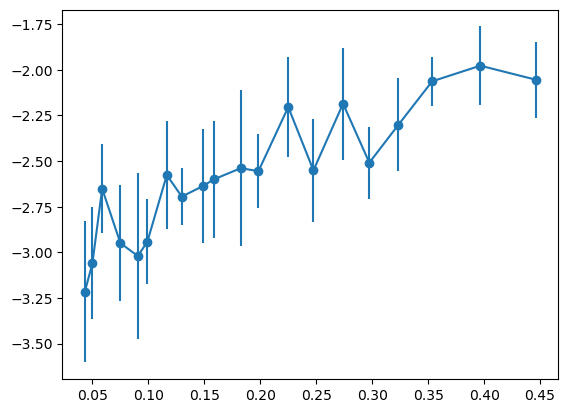

In [435]:
plt.scatter(x,y)
plt.errorbar(x,y,yerr = errory)

#### mean the y data
#### So that it is centred on 0

<ErrorbarContainer object of 3 artists>

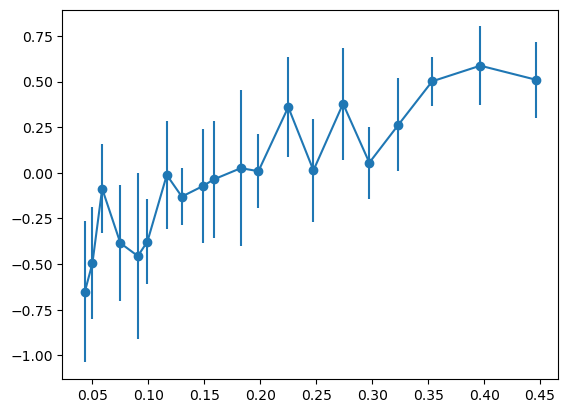

In [438]:
y = y - np.mean(y)
plt.scatter(x,y)
plt.errorbar(x,y,yerr = errory)

## No Noise

In [393]:
## We use random_state to make the random shuffle reproducable
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2,shuffle = True,random_state = 25,)
xtrain = xtrain.reshape(-1,1)
xtest = xtest.reshape(-1,1)
ytrain = ytrain.reshape(-1,1)
ytest = ytest.reshape(-1,1)
xpred = np.linspace(0.04,0.45,1000).reshape(-1,1)
ytrain = ytrain.ravel() 
ytest = ytest.ravel()

In [395]:
noise = 0  ## Noise added to true training points
bounds = [(1e-2, 1e2)]   ## These are bounds in for which minimisation can occur
initl = 1  ## This is the initial parameter for length
initvar = 1

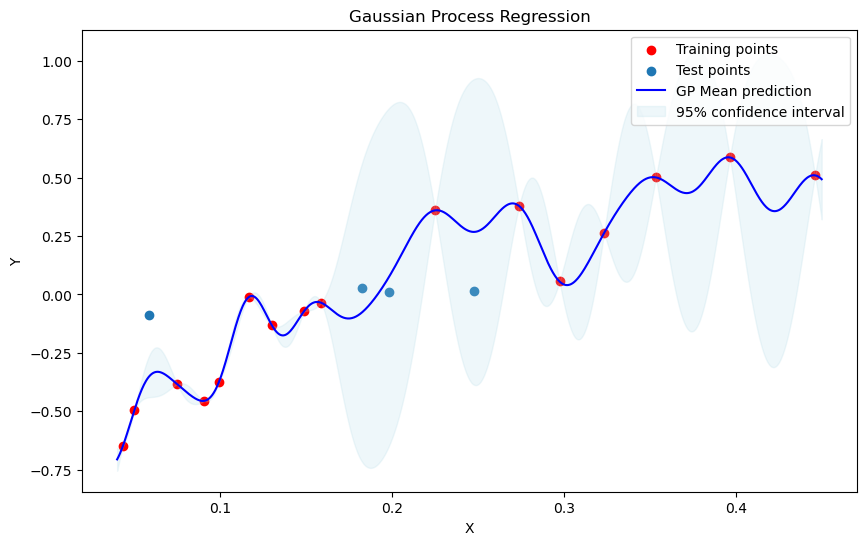

Optimal length scale parameter: 0.01676033270282147
Optimal variance scale parameter: 0.1436744473247113


In [413]:
kernel = C(constant_value = initvar,constant_value_bounds = bounds)* RBF(length_scale= initl, length_scale_bounds= bounds)
gp = GaussianProcessRegressor(kernel=kernel,alpha = noise**2, n_restarts_optimizer=10)
gp.fit(xtrain, ytrain)
y_pred, sigma = gp.predict(xpred, return_std=True)
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(xtrain, ytrain, c='r', label="Training points")
plt.scatter(xtest,ytest,label = 'Test points' )
plt.plot(xpred, y_pred, 'b-', label="GP Mean prediction")
plt.fill_between(xpred.ravel(), y_pred - 2 * sigma, y_pred + 2 * sigma, color="lightblue", alpha=0.2, label="95% confidence interval")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Gaussian Process Regression")
plt.legend()
plt.show()


## FIXME add in average

optimal_length_scale = gp.kernel_.k2.length_scale
optimal_var_scale = gp.kernel_.k1.constant_value
print(f"Optimal length scale parameter: {optimal_length_scale}")
print(f"Optimal variance scale parameter: {optimal_var_scale}")

## With Noise

In [454]:
## We use random_state to make the random shuffle reproducable
xtrain, xtest, ytrain, ytest = train_test_split(x, y + errory , test_size=0.2,shuffle = True,random_state = 25,)
xtrain = xtrain.reshape(-1,1)
xtest = xtest.reshape(-1,1)
ytrain = ytrain.reshape(-1,1)
ytest = ytest.reshape(-1,1)
xpred = np.linspace(0.04,0.45,1000).reshape(-1,1)
ytrain = ytrain.ravel() 
ytest = ytest.ravel()

## FIXME split up and have two arrays error train and error test

print(xtrain.shape)
print(ytrain.shape)

(16, 1)
(16,)


In [504]:
noise = 0.1
bounds = [(1e-2, 1e2)]   ## These are bounds in for which minimisation can occur
initl = 1  ## This is the initial parameter for length
initvar = 1

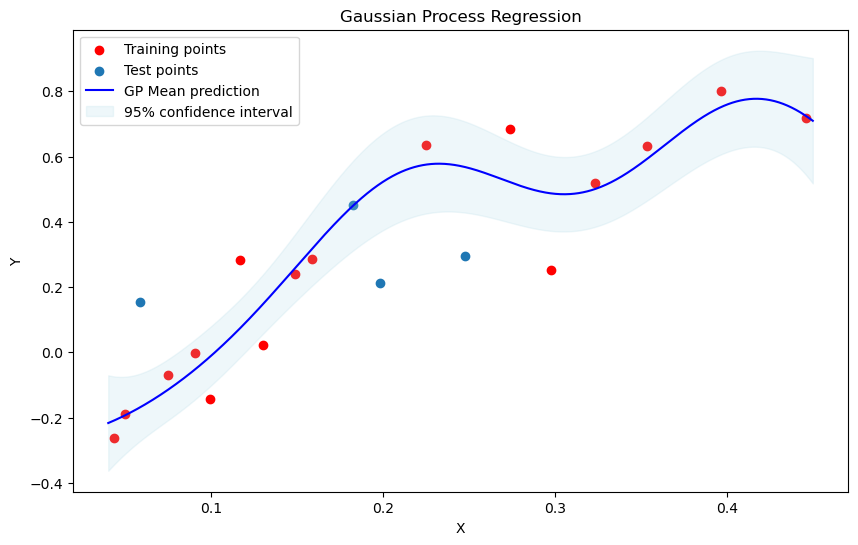

Optimal length scale parameter: 0.08652600741031836
Optimal variance scale parameter: 0.19515473408206688


In [506]:
kernel = C(constant_value = initvar,constant_value_bounds = bounds)* RBF(length_scale= initl, length_scale_bounds= bounds)
gp = GaussianProcessRegressor(kernel=kernel,alpha = noise**2, n_restarts_optimizer=10)
gp.fit(xtrain, ytrain)
y_pred, sigma = gp.predict(xpred, return_std=True)
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(xtrain, ytrain, c='r', label="Training points")
plt.scatter(xtest,ytest,label = 'Test points' )
plt.plot(xpred, y_pred, 'b-', label="GP Mean prediction")
plt.fill_between(xpred.ravel(), y_pred - 2 * sigma, y_pred + 2 * sigma, color="lightblue", alpha=0.2, label="95% confidence interval")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Gaussian Process Regression")
plt.legend()
plt.show()

optimal_length_scale = gp.kernel_.k2.length_scale
optimal_var_scale = gp.kernel_.k1.constant_value
print(f"Optimal length scale parameter: {optimal_length_scale}")
print(f"Optimal variance scale parameter: {optimal_var_scale}")

## White Kernel

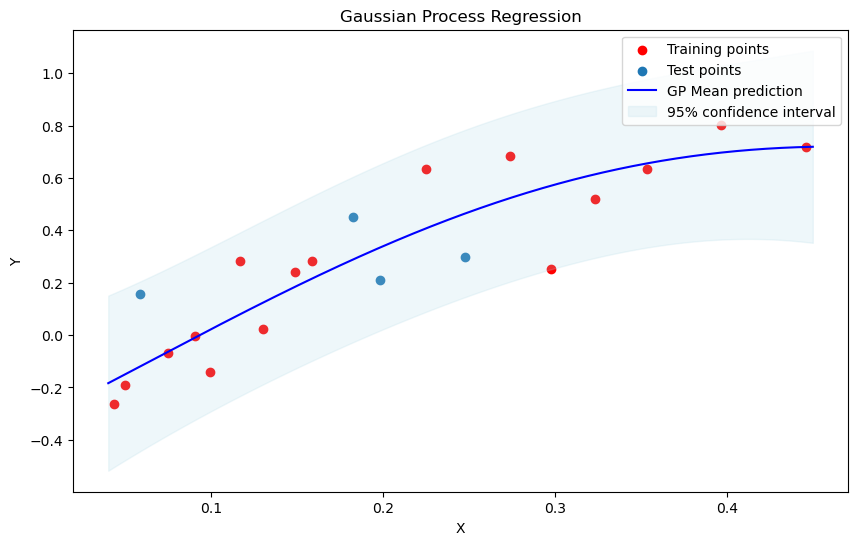

Optimal noise level: 0.022209321159603446
Optimal length scale parameter: 0.3994019936162313


In [509]:
noise = 0.05
bounds = [(1e-2, 1e2)]   ## These are bounds in for which minimisation can occur
initl = 1  ## This is the initial parameter for length
guessn = 1

kernel = (  # Kernel objects can simply be summed using +
    RBF(length_scale=initl, length_scale_bounds=bounds)
    + WhiteKernel(noise_level=guessn, noise_level_bounds=bounds)
)

gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gp.fit(xtrain, ytrain)
y_pred, sigma = gp.predict(xpred, return_std=True)
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(xtrain, ytrain, c='r', label="Training points")
plt.scatter(xtest,ytest,label = 'Test points' )
plt.plot(xpred, y_pred, 'b-', label="GP Mean prediction")
plt.fill_between(xpred.ravel(), y_pred - 2 * sigma, y_pred + 2 * sigma, color="lightblue", alpha=0.2, label="95% confidence interval")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Gaussian Process Regression")
plt.legend()
plt.show()

optimal_noise_level = gp.kernel_.k2.noise_level
optimal_length_scale = gp.kernel_.k1.length_scale
print(f"Optimal noise level: {optimal_noise_level}")
print(f"Optimal length scale parameter: {optimal_length_scale}")